### 목표
- 버섯의 특징을 활용해 독/식용 분류하는 모델을 만들어보자
- Decision Tree 시각화 & 과대적합 속성 제어
- 특성 중요도 확인

#### 환경준비

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#### 데이터 불러오기

In [2]:
# 판다스 옵션
# 출력하는 컬럼의 개수 설정
pd.set_option('display.max_columns', None)

In [3]:
# data = 불러서 담기
data = pd.read_csv('data/mushroom.csv')

# 행 5개 확인해보기
data.head(5)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
# 데이터 전체 크기 확인
# shape
data.shape # 23개의 열, 열 한개는 답이다.

(8124, 23)

In [5]:
# 데이터 전체 정보 출력
# 결측치, 데이터 타입, 열 개수, 행 개수
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 데이터 전처리
- 데이터 분리
- 인코딩

In [6]:
# 문제
# 답
X = data.iloc[:,1:]
y = data.iloc[:,0]

print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [7]:
# y 답 데이터 균형
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [8]:
# X 통계
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### 인코딩 : 범주형(문자) -> 연속형(숫자)
- one-hot encoding : 크기가 없는 값을 분류할 때 쓴다.
- label encoding : 크기가 있는 값을 분류할 때 쓴다. (순위 등)

In [9]:
# pd.get_dummies() -> one-hot encoding 하는 함수
X_oh = pd.get_dummies(X)
X_oh.shape

(8124, 117)

추가설명) 레이블 인코딩 예시

In [10]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [11]:
# 딕셔너리 맵핑 값을 정의
habitat_dict = {
    'u':1,
    'g':3,
    'm':2,
    'd':5,
    'p':4,
    'w':6,
    'l':7
}

# map 함수로 맵핑
X['habitat'].map(habitat_dict)

0       1
1       3
2       2
3       1
4       3
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [12]:
# 훈련셋, 테스트셋 분리
# random_state = 0
# 7:3
# 4개의 변수에 담기
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_oh,
    y,
    test_size=0.3,
    random_state=0
)

In [13]:
print('훈련용 문제',X_train.shape)
print('훈련용 답',y_train.shape)
print('테스트용 문제',X_test.shape)
print('테스트용 답',y_test.shape)

훈련용 문제 (5686, 117)
훈련용 답 (5686,)
테스트용 문제 (2438, 117)
테스트용 답 (2438,)


#### 모델링

In [16]:
# 모델 객체 정의
tree_model = DecisionTreeClassifier() # 이번에는 과대적합 제어 키워드 쓰지말자. 하이퍼 파리미터 ㅇㅇ 그거

##### 교차검증
- 개념: 모델의 일반화 성능 측정 방법
    - 모든 데이터에 대해 모델이 얼마나 잘 예측하는지 평가
    - 한번 검증하는 것 보다 여러번 검증하는 게 믿을만 하다
- 방법론: 훈련세트와 검증세트로 여러겹 나누어 평가
- 모델을 정의하고 하이퍼 파라미터도 지정하고 학습하기 전에 정확도를 알아본다

In [17]:
# 만든 모델의 일반화 성능 확인
# 교차검증 횟수 지정(테스트 데이터 분리 횟수) : cv

from sklearn.model_selection import cross_val_score
tree_model_result = cross_val_score(tree_model, X_train, y_train, cv=5)

print('교차검증 결과:', tree_model_result)
print('교차검증 결과 평균값:', tree_model_result.mean())

교차검증 결과: [1.         1.         1.         1.         0.99912049]
교차검증 결과 평균값: 0.9998240985048372


In [18]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# 모델 예측
pre = tree_model.predict(X_test)
pre

array(['p', 'e', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [20]:
# 모델 평가 - 정확도 확인
tree_model.score(X_test, y_test)

1.0

#### 트리 모델 시각화 패키지 설치

In [22]:
# tree 학습 현황 시각화
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file='tree.dot',
    class_names=['독', '식용'],
    feature_names=X_train.columns,
    filled=True
)

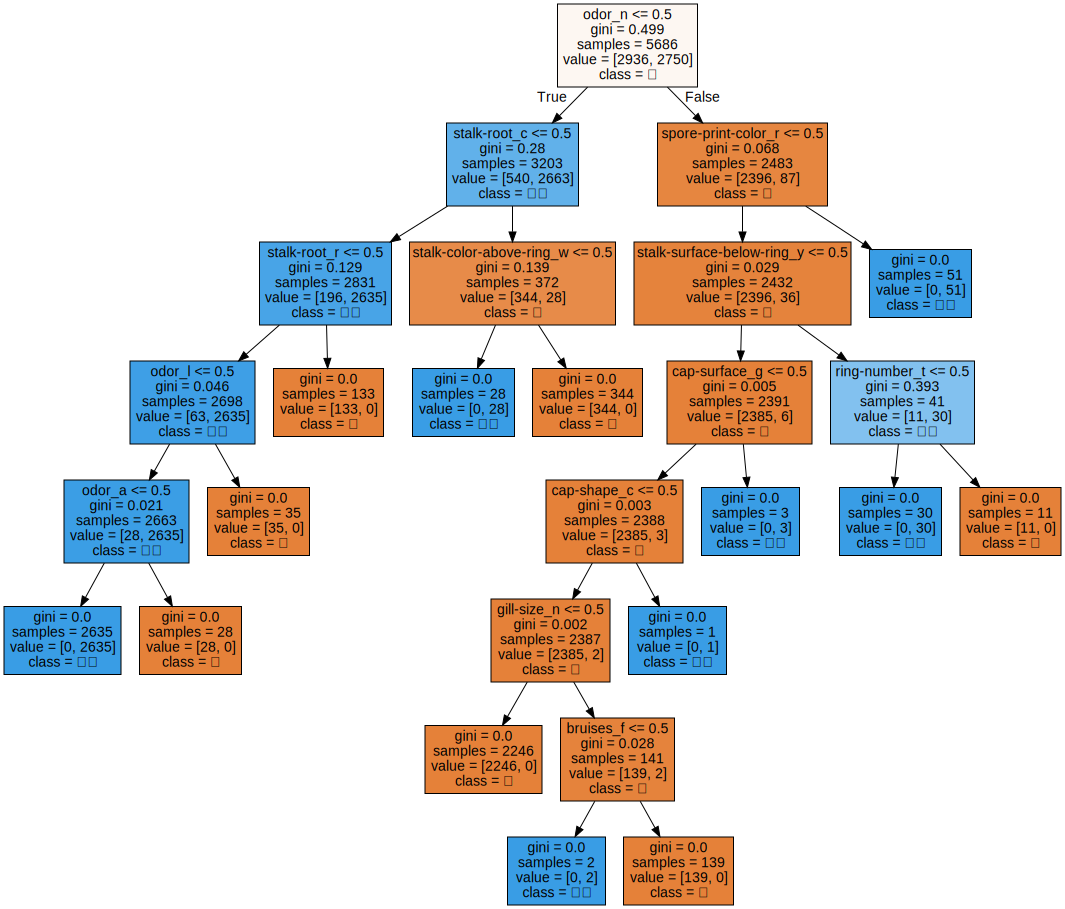

In [23]:
import graphviz
# 파일 열기
with open('tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [24]:
# 과대적합 제어 (가정)
# max_depth : 모델의 최대 깊이 설정
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
# 깊이 제어 모델 시각화
# tree 학습 현황 시각화
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model2,
    out_file='tree2.dot',
    class_names=['독', '식용'],
    feature_names=X_train.columns,
    filled=True
)

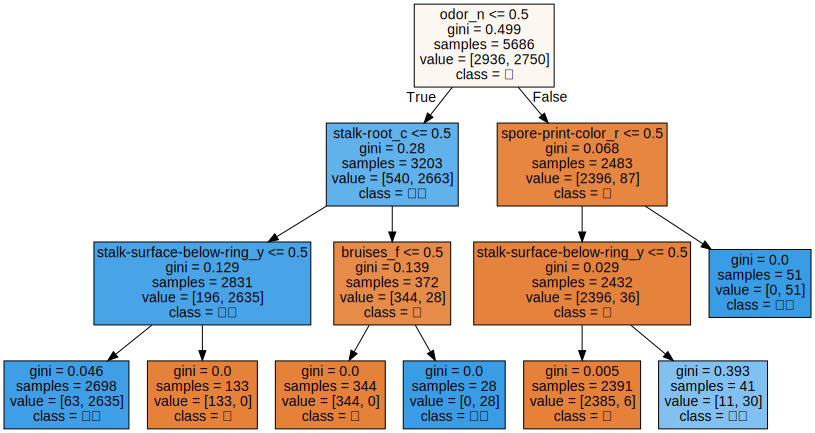

In [26]:
import graphviz
# 파일 열기
with open('tree2.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 특성 중요도 확인

In [27]:
fi = tree_model.feature_importances_

# df로 만들기
fi_df = pd.DataFrame(fi, index=X_train.columns)

# 높은 순으로 정렬
# 데이터 프레임으로 value 값 정렬할 때 기준 특성을 지정한다???
fi_df.sort_values(by=0, ascending=False)

,0
odor_n,0.624704
stalk-root_c,0.169466
stalk-root_r,0.085143
spore-print-color_r,0.034145
odor_l,0.023820
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000
